<a href="https://colab.research.google.com/github/Omkar-Kaos/C.V.-Experiments/blob/main/C_V_Experiment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter a digit from your roll number (1032220231): 1


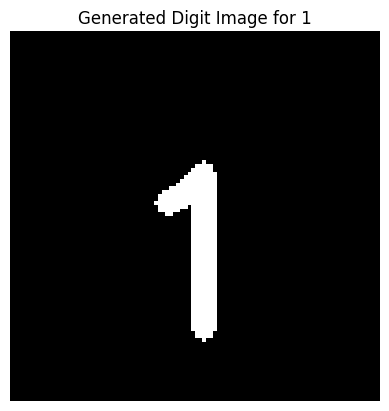

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to generate an image of a given digit
def generate_digit_image(digit_char):
    img = np.zeros((100, 100), dtype=np.uint8)
    cv2.putText(img, digit_char, (30, 80), cv2.FONT_HERSHEY_SIMPLEX, 2, 255, 5)
    return img

# Take a digit from roll number
roll_number = "1032220231"
selected_digit = input(f"Enter a digit from your roll number ({roll_number}): ")

# Generate digit image
digit_image = generate_digit_image(selected_digit)

# Show the generated image
plt.imshow(digit_image, cmap='gray')
plt.title(f"Generated Digit Image for {selected_digit}")
plt.axis('off')
plt.show()


Number of contours found: 1


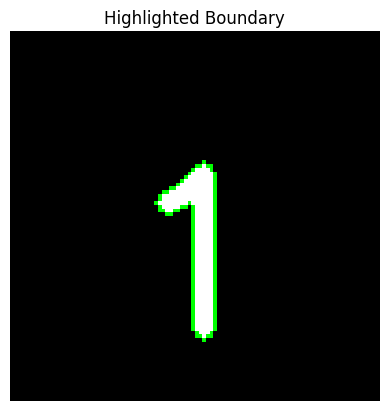

In [ ]:
# Convert to binary image
_, thresh = cv2.threshold(digit_image, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Display contour information
print("Number of contours found:", len(contours))

# Draw boundary around the contour
border_image = cv2.cvtColor(digit_image, cv2.COLOR_GRAY2BGR)

if contours:
    contour = contours[0]
    for point in contour:
        x, y = point[0]
        border_image[y, x] = (0, 255, 0)  # Mark contour points

    # Show the boundary image
    plt.imshow(border_image)
    plt.title("Highlighted Boundary")
    plt.axis('off')
    plt.show()
else:
    print("No contours found.")


In [ ]:
# Function to compute chain code
def compute_chain_code(contour):
    directions = {
        (0, 1): 0,  (1, 1): 1,  (1, 0): 2,  (1, -1): 3,
        (0, -1): 4, (-1, -1): 5, (-1, 0): 6, (-1, 1): 7
    }
    chain_code = []
    for i in range(1, len(contour)):
        x1, y1 = contour[i-1][0]
        x2, y2 = contour[i][0]
        dx = x2 - x1
        dy = y2 - y1
        if (dx, dy) in directions:
            chain_code.append(directions[(dx, dy)])
    return chain_code

# Compute chain code
if contours:
    contour = contours[0]
    chain_code = compute_chain_code(contour)
    print("Original Chain Code:", chain_code)


Original Chain Code: [7, 6, 7, 7, 7, 7, 7, 7, 6, 7, 6, 7, 0, 7, 1, 0, 2, 1, 2, 3, 2, 3, 2, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 3, 2, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 6]


In [ ]:
# Function to downsample chain code
def downsample_chain_code(chain_code, max_order=10):
    step = max(1, len(chain_code) // max_order)
    return chain_code[::step]

# Function to compute first difference
def compute_first_difference(chain_code):
    return [(chain_code[i] - chain_code[i-1]) % 8 for i in range(1, len(chain_code))]

# Downsampling and computing first difference
if contours:
    downsampled_code = downsample_chain_code(chain_code)
    print("Downsampled Chain Code:", downsampled_code)

    first_difference = compute_first_difference(downsampled_code)
    print("First Difference:", first_difference)


Downsampled Chain Code: [7, 7, 2, 0, 0, 0, 4, 4, 4, 4, 6]
First Difference: [0, 3, 6, 0, 0, 4, 0, 0, 0, 2]


In [ ]:
# Function to find shape number (rotation-invariant)
def compute_shape_number(first_difference):
    rotations = [first_difference[i:] + first_difference[:i] for i in range(len(first_difference))]
    return min(rotations)

# Compute shape number
if contours:
    shape_number = compute_shape_number(first_difference)
    print("Shape Number:", shape_number)


Shape Number: [0, 0, 0, 2, 0, 3, 6, 0, 0, 4]
